In [1]:
from utils import *
import pandas as pd

In [2]:
reader = PriceReader()
trn = reader(['BERRIES'], [0, 1])

In [4]:
trn

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,perc_time,r
timestamp,,,,,,,,,,,,,,,,,,
0,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.000000,0.0000,NaN
100,0,BERRIES,3996.0,12.0,3995.0,59.0,NaN,NaN,4003.0,12.0,4004.0,59.0,NaN,NaN,3999.5,20.396484,0.0001,-0.000125
200,0,BERRIES,3995.0,14.0,3994.0,52.0,NaN,NaN,4002.0,14.0,4003.0,52.0,NaN,NaN,3998.5,26.556641,0.0002,-0.000250
300,0,BERRIES,3995.0,11.0,3994.0,42.0,NaN,NaN,4002.0,11.0,4003.0,42.0,NaN,NaN,3998.5,24.740234,0.0003,0.000000
400,0,BERRIES,3996.0,13.0,3995.0,56.0,NaN,NaN,4003.0,13.0,4004.0,56.0,NaN,NaN,3999.5,22.498047,0.0004,0.000250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999500,1,BERRIES,3847.0,17.0,3846.0,51.0,NaN,NaN,3853.0,17.0,3854.0,51.0,NaN,NaN,3850.0,228972.000000,0.9995,0.000130
1999600,1,BERRIES,3847.0,19.0,3846.0,40.0,NaN,NaN,3853.0,19.0,3854.0,40.0,NaN,NaN,3850.0,229520.000000,0.9996,0.000000
1999700,1,BERRIES,3847.0,15.0,3846.0,54.0,NaN,NaN,3854.0,15.0,3855.0,54.0,NaN,NaN,3850.5,226100.000000,0.9997,0.000130


In [3]:
train.tail()

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,dolphin
timestamp,,,,,,,,,,,,,,,,
1999500,DIVING_GEAR,99191.0,10.0,99190.0,17.0,NaN,NaN,99193.0,10.0,99194.0,17.0,NaN,NaN,99192.0,-18400.0,3075.0
1999600,DIVING_GEAR,99184.0,26.0,NaN,NaN,NaN,NaN,99187.0,26.0,NaN,NaN,NaN,NaN,99185.5,-8816.0,3076.0
1999700,DIVING_GEAR,99192.0,9.0,99191.0,15.0,NaN,NaN,99194.0,9.0,99195.0,15.0,NaN,NaN,99193.0,-19568.0,3076.0
1999800,DIVING_GEAR,99186.0,22.0,NaN,NaN,NaN,NaN,99189.0,22.0,NaN,NaN,NaN,NaN,99187.5,-12128.0,3075.0
1999900,DIVING_GEAR,99195.0,9.0,99194.0,15.0,NaN,NaN,99197.0,9.0,99198.0,15.0,NaN,NaN,99196.0,-23760.0,3075.0


In [4]:
train['dlpn_change'] = train['dolphin'].pct_change()
train['return'] = train['mid_price'].pct_change()

In [5]:
trades = load_trades('train', 'DIVING_GEAR', 3)
trades['dlpn'] = dlpn['mid_price'].loc[trades.index]

<Axes: xlabel='dlpn', ylabel='price'>

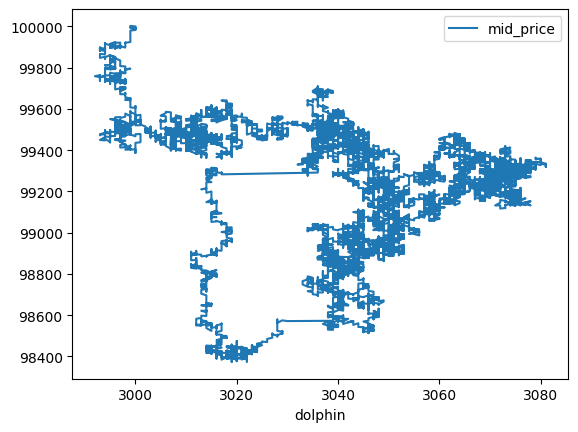

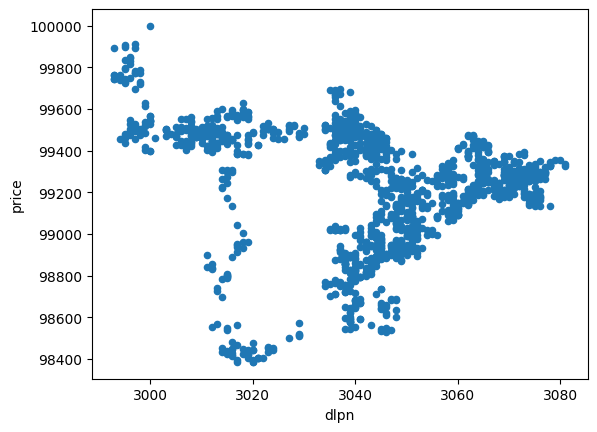

In [6]:
train.plot(x='dolphin', y='mid_price', kind='line')
trades.plot(x='dlpn', y='price', kind='scatter')

In [11]:
val = load_product('val', 'DIVING_GEAR', 3)
val['dolphin'] = load_product('val', 'DOLPHIN_SIGHTINGS', 3)['mid_price']

<Axes: xlabel='dolphin'>

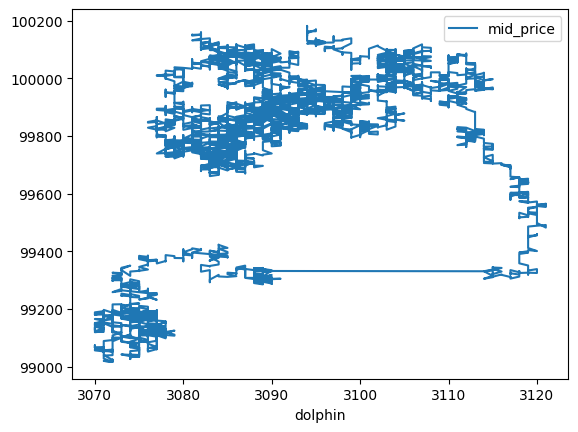

In [12]:
val.plot(x='dolphin', y='mid_price', kind='line')

<Axes: xlabel='dlpn_change', ylabel='return'>

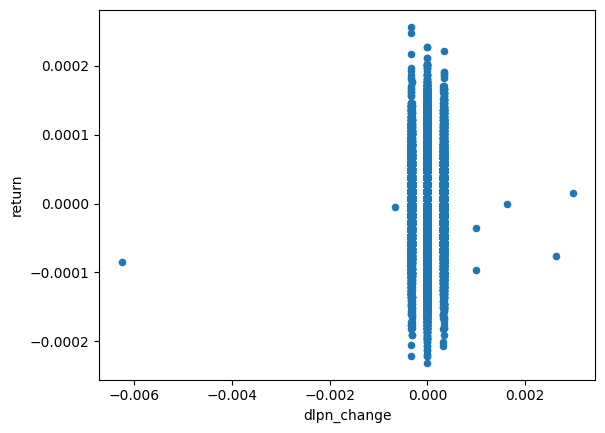

In [14]:
train.plot(x='dlpn_change', y='return', kind='scatter')

In [15]:
train['return+1'] = train['return'].shift(-1)

<Axes: xlabel='dlpn_change', ylabel='return+1'>

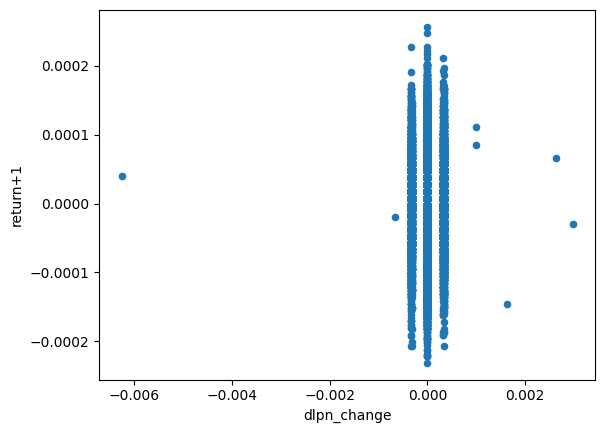

In [16]:
train.plot(x='dlpn_change', y='return+1', kind='scatter')

<Axes: xlabel='return', ylabel='return+1'>

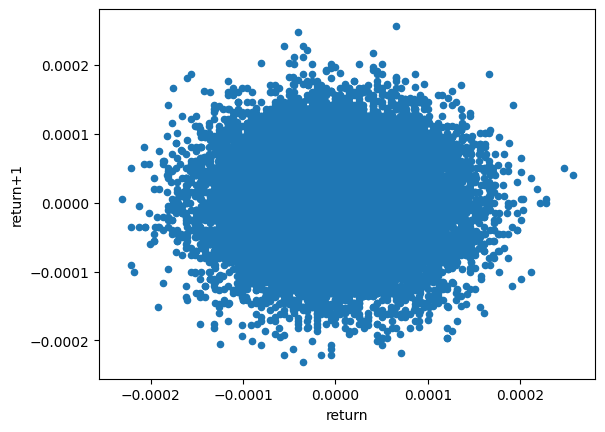

In [17]:
train.plot(x='return', y='return+1', kind='scatter')